In [1]:
#import libraries and packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

#import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [2]:
#read the dataset and take a briefly look at it
df = pd.read_csv('twitter-airline-sentiment.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#the dataset has 14640 rows with 15 columns
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 14640 observations and 15 features in this dataset. 



In [ ]:
#we definitely have some empty value needed to deal since we can see that there are few NaN in 'negativereason' obviously

In [4]:
#maybe add count of missing values

In [5]:
#drop the id column because it wont effect prediction anyway
df.drop(['tweet_id'], 1, inplace=True)

In [6]:
#check again after drop
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


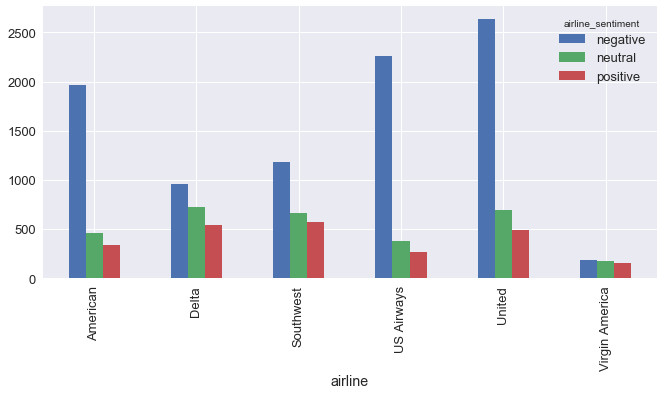

In [7]:
#visuliza each airline company with number of each sentiment
#looks like united has the most number of negative sentiment :)
df.groupby(['airline', 'airline_sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))

In [ ]:
#lets make some word cloud to check out which words are the most frequent one used in twitter against negative sentiment
#looks like people use 'flight', 'help','time', 'bag' a lot

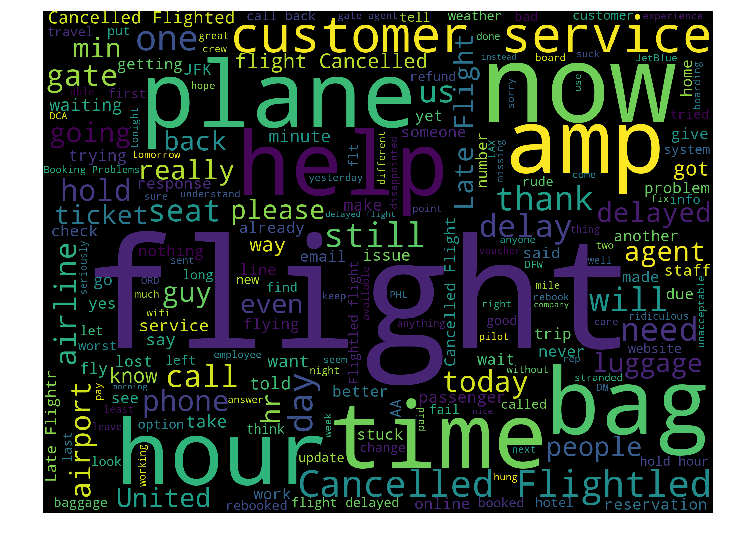

In [8]:
from wordcloud import WordCloud,STOPWORDS
negative=df[df['airline_sentiment']=='negative'] 
words_neg = ' '.join(negative['text'])
cleaned_word_neg = " ".join([word for word in words_neg.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(cleaned_word_neg)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

In [ ]:
#same for positive sentiment
#looks like 'service', 'time' becomes the top primary consideration of positive

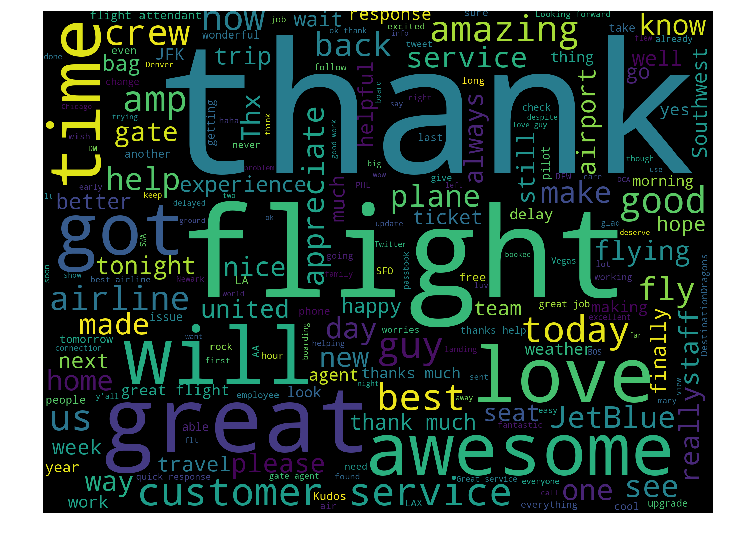

In [9]:
positive=df[df['airline_sentiment']=='positive'] 
words_pos = ' '.join(positive['text'])
cleaned_word_pos = " ".join([word for word in words_pos.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(cleaned_word_pos)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

In [10]:
# total number of negative ,neutral and positive mood
airline_sentiment  = df['airline_sentiment'].value_counts()
print(airline_sentiment)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


# we have to pay more attention here, if we cant deal with this issue properly, it is going to be a problem

In [ ]:
#the number of negative is more than neutral and positive
#it is not hard to understand that people tend to complain about it online instead of giving positive feedback

Text(0.5,1,'Count of Sentiments')

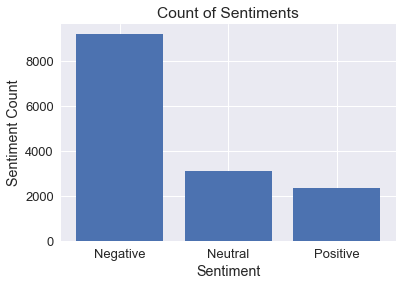

In [11]:
mood_count = df['airline_sentiment'].value_counts()
mood_count
Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['Negative', 'Neutral', 'Positive'])
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')

plt.title('Count of Sentiments')

In [12]:
#pick up the three columns we are going to use in prediction
df = df[['airline_sentiment', 'airline','text' ]]
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [13]:
# removes every thing except text
# we dont want @virginamerica especially
df['text']=df['text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
# now tokenize text
df['text']=df['text'].apply(nltk.word_tokenize)
#first five row is printing after tokenized
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,"[What, said]"
1,positive,Virgin America,"[plus, youve, added, commercials, to, the, exp..."
2,neutral,Virgin America,"[I, didnt, today, Must, mean, I, need, to, tak..."
3,negative,Virgin America,"[its, really, aggressive, to, blast, obnoxious..."
4,negative,Virgin America,"[and, its, a, really, big, bad, thing, about, it]"


In [14]:
#Stemming each word 
stemmer = SnowballStemmer('english')
df['text']=df['text'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,"[what, said]"
1,positive,Virgin America,"[plus, youv, ad, commerci, to, the, experi, ta..."
2,neutral,Virgin America,"[i, didnt, today, must, mean, i, need, to, tak..."
3,negative,Virgin America,"[it, realli, aggress, to, blast, obnoxi, enter..."
4,negative,Virgin America,"[and, it, a, realli, big, bad, thing, about, it]"


In [15]:
# removing stopword 
stopwords = nltk.corpus.stopwords.words('english')
df['text']=df['text'].apply(lambda x: [y for y in x if y not in stopwords])
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,[said]
1,positive,Virgin America,"[plus, youv, ad, commerci, experi, tacki]"
2,neutral,Virgin America,"[didnt, today, must, mean, need, take, anoth, ..."
3,negative,Virgin America,"[realli, aggress, blast, obnoxi, entertain, gu..."
4,negative,Virgin America,"[realli, big, bad, thing]"


In [16]:
# Detokenize cleaned dataframe for vectorizing
df['text'] = df['text'].str.join(" ")

df.shape
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,said
1,positive,Virgin America,plus youv ad commerci experi tacki
2,neutral,Virgin America,didnt today must mean need take anoth trip
3,negative,Virgin America,realli aggress blast obnoxi entertain guest fa...
4,negative,Virgin America,realli big bad thing


In [17]:
#transforming postive to 2, netural to 1, negative to 0
sentiment = sorted(df['airline_sentiment'].unique())
sentiment_mapping = dict(zip(sentiment, range(0, len(sentiment) + 1)))
df['airline_sentiment']  = df['airline_sentiment'].map(sentiment_mapping).astype(int)
df.head()

,airline_sentiment,airline,text
0,1,Virgin America,said
1,2,Virgin America,plus youv ad commerci experi tacki
2,1,Virgin America,didnt today must mean need take anoth trip
3,0,Virgin America,realli aggress blast obnoxi entertain guest fa...
4,0,Virgin America,realli big bad thing


In [19]:
df.drop(['airline'], 1, inplace=True)
df.head()

,airline_sentiment,text
0,1,said
1,2,plus youv ad commerci experi tacki
2,1,didnt today must mean need take anoth trip
3,0,realli aggress blast obnoxi entertain guest fa...
4,0,realli big bad thing


In [20]:
#define x and y
X = df['text']
y = df['airline_sentiment']

In [21]:
#import packages used to split dataset into training and test
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
ctvt = CountVectorizer(analyzer = 'word')
#  fit and transform X_train into X_tr
X_train = ctvt.fit_transform(X_train)
# transform X_test into X_te
X_test = ctvt.transform(X_test)
print ("After vectorizing size of x_train = ", X_train.shape)
print ("After vectorizing size of x_test = ", X_test.shape)

After vectorizing size of x_train =  (11712, 8714)
After vectorizing size of x_test =  (2928, 8714)


In [23]:
#now we try navies bayes as first model
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train, y_train)

accuracy = round(model.score(X_test, y_test),5)
print(accuracy)

0.76469


In [24]:
#logistic regression as second model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred = model2.predict(X_test)
acc = round(model2.score(X_train, y_train),5)
acc

C:\Users\caozm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.92042

# remember the issue we talked about earlier, the accuracy here is 92%, though it might be wrong since we can predict sentiment with higher accuracy with more number of negative sentiment